# Stream with a bar 

This notebook has some quick code showing how to integrate a stream in a potential with a bar. It compares it to a case with no bar. 

In [1]:
import tstrippy
import numpy as np 
import matplotlib.pyplot as plt
import astropy.units as u   
import astropy.constants as const
import astropy.coordinates as coord
plt.rcParams['figure.figsize'] = [10, 5]
# make the font bigger
plt.rcParams.update({'font.size': 22})
# make the font style the same as latex
plt.rcParams['mathtext.fontset'] = 'stix'

In [2]:
def vanilla_single_GC_backward(initialkinematics,integrationparameters,staticgalaxy):
    x0,y0,z0,vx0,vy0,vz0=initialkinematics
    T,dt,NSTEP=integrationparameters 
    potentialname,MWparams=staticgalaxy
    tstrippy.integrator.setinitialkinematics(x0,y0,z0,vx0,vy0,vz0)
    tstrippy.integrator.setintegrationparameters(T,dt,NSTEP)
    tstrippy.integrator.setstaticgalaxy(potentialname,MWparams)
    tstrippy.integrator.setbackwardorbit()
    xt,yt,zt,vxt,vyt,vzt = tstrippy.integrator.leapfrogintime(NSTEP,1)
    timestamps=tstrippy.integrator.timestamps.copy()
    tstrippy.integrator.deallocate()
    xt,yt,zt=xt[0],yt[0],zt[0]
    vxt,vyt,vzt=vxt[0],vyt[0],vzt[0]
    return timestamps,xt,yt,zt,vxt,vyt,vzt

In [3]:
def vanilla_leapfrogtofinalpositions(initialkinematics,integrationparameters,staticgalaxy):
    x0,y0,z0,vx0,vy0,vz0=initialkinematics
    T,dt,NSTEP=integrationparameters 
    potentialname,MWparams=staticgalaxy
    tstrippy.integrator.setinitialkinematics(x0,y0,z0,vx0,vy0,vz0)
    tstrippy.integrator.setintegrationparameters(T,dt,NSTEP)
    tstrippy.integrator.setstaticgalaxy(potentialname,MWparams)
    tstrippy.integrator.setbackwardorbit()
    tstrippy.integrator.leapfrogtofinalpositions()
    xf= tstrippy.integrator.xf[0].copy()
    yf= tstrippy.integrator.yf[0].copy()
    zf= tstrippy.integrator.zf[0].copy()
    vxf= tstrippy.integrator.vxf[0].copy()
    vyf= tstrippy.integrator.vyf[0].copy()
    vzf= tstrippy.integrator.vzf[0].copy()
    tstrippy.integrator.deallocate()
    return xf,yf,zf,vxf,vyf,vzf

In [4]:
def bar_single_GC_backward(initialkinematics,integrationparameters,staticgalaxy,galacticbar):
    x0,y0,z0,vx0,vy0,vz0=initialkinematics
    T,dt,NSTEP=integrationparameters 
    potentialname,MWparams=staticgalaxy
    barname,barparams,barpolycoeff = galacticbar 

    ## REDUCE THE MASS OF THE DISKS to compensate for the bar
    G,Mbar,abar,bbar,cbar = barparams
    G,Mhalo,ahalo,exphalo,rcuthalo,Mdisk1,adisk1,bdisk1,Mdisk2,adisk2,bdisk2=MWparams
    Mdisk1 = Mdisk1 - Mbar/2
    Mdisk2 = Mdisk2 - Mbar/2
    MWparams_bar = [G,Mhalo,ahalo,exphalo,rcuthalo,Mdisk1,adisk1,bdisk1,Mdisk2,adisk2,bdisk2]

    tstrippy.integrator.setintegrationparameters(T,dt,NSTEP)
    tstrippy.integrator.setinitialkinematics(x0,y0,z0,vx0,vy0,vz0)
    tstrippy.integrator.setstaticgalaxy(potentialname,MWparams_bar)
    tstrippy.integrator.initgalacticbar(barname,barparams,barpolycoeff)
    tstrippy.integrator.setbackwardorbit()
    xt,yt,zt,vxt,vyt,vzt = tstrippy.integrator.leapfrogintime(NSTEP,1)
    timestamps=tstrippy.integrator.timestamps.copy()
    tstrippy.integrator.deallocate()
    xt,yt,zt=xt[0],yt[0],zt[0]
    vxt,vyt,vzt=vxt[0],vyt[0],vzt[0]
    return timestamps,xt,yt,zt,vxt,vyt,vzt

In [5]:
def bar_leapfrogtofinalpositions(initialkinematics,integrationparameters,staticgalaxy,galacticbar):
    x0,y0,z0,vx0,vy0,vz0=initialkinematics
    T,dt,NSTEP=integrationparameters 
    potentialname,MWparams=staticgalaxy
    barname,barparams,barpolycoeff = galacticbar 

    ## REDUCE THE MASS OF THE DISKS to compensate for the bar
    G,Mbar,abar,bbar,cbar = barparams
    G,Mhalo,ahalo,exphalo,rcuthalo,Mdisk1,adisk1,bdisk1,Mdisk2,adisk2,bdisk2=MWparams
    Mdisk1 = Mdisk1 - Mbar/2
    Mdisk2 = Mdisk2 - Mbar/2
    MWparams_bar = [G,Mhalo,ahalo,exphalo,rcuthalo,Mdisk1,adisk1,bdisk1,Mdisk2,adisk2,bdisk2]

    tstrippy.integrator.setintegrationparameters(T,dt,NSTEP)
    tstrippy.integrator.setinitialkinematics(x0,y0,z0,vx0,vy0,vz0)
    tstrippy.integrator.setstaticgalaxy(potentialname,MWparams_bar)
    tstrippy.integrator.initgalacticbar(barname,barparams,barpolycoeff)
    tstrippy.integrator.setbackwardorbit()
    tstrippy.integrator.leapfrogtofinalpositions()
    xfbar= tstrippy.integrator.xf[0].copy()
    yfbar= tstrippy.integrator.yf[0].copy()
    zfbar= tstrippy.integrator.zf[0].copy()
    vxfbar= tstrippy.integrator.vxf[0].copy()
    vyfbar= tstrippy.integrator.vyf[0].copy()
    vzfbar= tstrippy.integrator.vzf[0].copy()
    tstrippy.integrator.deallocate()
    return xfbar,yfbar,zfbar,vxfbar,vyfbar,vzfbar

In [6]:
def generate_vanilla_stream(initialkinematics,integrationparameters,staticgalaxy,hostperturber):
    x0,y0,z0,vx0,vy0,vz0=initialkinematics
    T,dt,NSTEP=integrationparameters 
    potentialname,MWparams=staticgalaxy
    timestamps,xt,yt,zt,vxt,vyt,vzt,massH,radiusH = hostperturber

    tstrippy.integrator.setintegrationparameters(T,dt,NSTEP)
    tstrippy.integrator.setinitialkinematics(x0,y0,z0,vx0,vy0,vz0)
    tstrippy.integrator.setstaticgalaxy(potentialname,MWparams)
    tstrippy.integrator.inithostperturber(timestamps,xt,yt,zt,vxt,vyt,vzt,massH,radiusH)
    tstrippy.integrator.leapfrogtofinalpositions()
    xf= tstrippy.integrator.xf.copy()
    yf= tstrippy.integrator.yf.copy()
    zf= tstrippy.integrator.zf.copy()
    vxf= tstrippy.integrator.vxf.copy()
    vyf= tstrippy.integrator.vyf.copy()
    vzf= tstrippy.integrator.vzf.copy()
    finaltime=tstrippy.integrator.currenttime
    tstrippy.integrator.deallocate()
    print(finaltime)
    return xf,yf,zf,vxf,vyf,vzf

In [7]:
def generate_bar_stream(initialkinematics,integrationparameters,staticgalaxy,galacticbar,hostperturber):
    x0,y0,z0,vx0,vy0,vz0=initialkinematics
    T,dt,NSTEP=integrationparameters 
    potentialname,MWparams=staticgalaxy 
    timestamps,xt,yt,zt,vxt,vyt,vzt,massH,radiusH = hostperturber
    barname,barparams,barpolycoeff = galacticbar

    ## REDUCE THE MASS OF THE DISKS to compensate for the bar
    G,Mbar,abar,bbar,cbar = barparams
    G,Mhalo,ahalo,exphalo,rcuthalo,Mdisk1,adisk1,bdisk1,Mdisk2,adisk2,bdisk2=MWparams
    Mdisk1 = Mdisk1 - Mbar/2
    Mdisk2 = Mdisk2 - Mbar/2
    MWparams_bar = [G,Mhalo,ahalo,exphalo,rcuthalo,Mdisk1,adisk1,bdisk1,Mdisk2,adisk2,bdisk2]

    tstrippy.integrator.setintegrationparameters(T,dt,NSTEP)
    tstrippy.integrator.setinitialkinematics(x0,y0,z0,vx0,vy0,vz0)
    tstrippy.integrator.setstaticgalaxy(potentialname,MWparams_bar)
    tstrippy.integrator.inithostperturber(timestamps,xt,yt,zt,vxt,vyt,vzt,massH,radiusH)
    tstrippy.integrator.initgalacticbar(barname,barparams,barpolycoeff)
    
    tstrippy.integrator.leapfrogtofinalpositions()
    
    xf= tstrippy.integrator.xf.copy()
    yf= tstrippy.integrator.yf.copy()
    zf= tstrippy.integrator.zf.copy()
    vxf= tstrippy.integrator.vxf.copy()
    vyf= tstrippy.integrator.vyf.copy()
    vzf= tstrippy.integrator.vzf.copy()
    tstrippy.integrator.deallocate()
    return xf,yf,zf,vxf,vyf,vzf

pick the cluster and get the units

In [8]:
GCname = "NGC5139"
unitT=u.Unit(tstrippy.Parsers.potential_parameters.unitbasis['time'])
unitD=u.Unit(tstrippy.Parsers.potential_parameters.unitbasis['distance'])
unitM=u.Unit(tstrippy.Parsers.potential_parameters.unitbasis['mass'])
unitV=u.Unit(tstrippy.Parsers.potential_parameters.unitbasis['velocity'])
print("Mass", unitM)
print("Distance", unitD)
print("Time", unitT)
print("Velocity", unitV)

Mass solMass
Distance kpc
Time kpc s / km
Velocity km / s


pick the base potential

In [9]:
potentialname="pouliasis2017pii"
MWparams=tstrippy.Parsers.potential_parameters.pouliasis2017pii()

set the bar parameters

In [10]:
barname = "longmuralibar"
abar = 4 * unitD
bbar = 1 * unitD
cbar = 0.5 * unitD
Mbar = 990.0*2.32*1e7 * unitM
barparams = [MWparams[0],Mbar.value,abar.value,bbar.value,cbar.value]

set the bar oreitnation and bar pattern speed. Note that the bar pattern speed is negative because the galactocentric reference frame is a left handed coordinate system, and the bar's angular momentum vector must be aligned with the -z-axis in order to rotate with the galaxy.

In [11]:
# oreitnation and bar pattern speed
theta0=  25 * (np.pi/180) 
omega =  39  * unitV / unitD
omega = -omega.value
barpolycoeff=[theta0,omega]

pack the galactic bar, which is the name, potential params, and movement parameters

In [12]:
galacticbar = [barname,barparams,barpolycoeff]

In [13]:
# initial kinematics 
GCs=tstrippy.Parsers.baumgardtMWGCs()
means,covar=GCs.getGCCovarianceMatrix(GCname)
refframe=tstrippy.Parsers.potential_parameters.MWreferenceframe()

RA,DEC,Rsun,RV,mualpha,mu_delta,Mass,rh_m=means
skycoords = coord.SkyCoord(ra=RA*u.deg, dec=DEC*u.deg, distance=Rsun*u.kpc, pm_ra_cosdec=mualpha*u.mas/u.yr, pm_dec=mu_delta*u.mas/u.yr, radial_velocity=RV*u.km/u.s,)
galcen = skycoords.transform_to(refframe)
x0,y0,z0=galcen.cartesian.without_differentials().xyz.value
vx0,vy0,vz0=galcen.velocity.d_xyz.value
# negative velocity because we are going backwards 
initialkinematics=x0,y0,z0,-vx0,-vy0,-vz0

The integration parameters are the current time, the time step, and how many steps to go. They need to be in the proper units

In [14]:
# integration parameters
integrationtime = 2e9*u.yr
dt = 1e5*u.yr
unitT=u.Unit(tstrippy.Parsers.potential_parameters.unitbasis['time'])
NSTEP = int(integrationtime/dt)
# converto ingetal units
integrationtime=integrationtime.to(unitT).value
currenttime = 0 
dt=dt.to(unitT).value
integrationparams=currenttime,dt,NSTEP

the parameters for the time-independent component of the milky way

In [15]:
potentialname="pouliasis2017pii"
MWparams=tstrippy.Parsers.potential_parameters.pouliasis2017pii()
staticgalaxy=potentialname,MWparams

sample the particles with a plummer sphere to create the stream with

In [16]:
G = tstrippy.Parsers.potential_parameters.G
NP = int(5e2)
halfmassradius = 5/1000
rchost=tstrippy.ergodic.convertHalfMassRadiusToPlummerRadius(halfmassradius)
massHost = 1e5
xp,yp,zp,vxp,vyp,vzp=tstrippy.ergodic.isotropicplummer(G,massHost,halfmassradius,NP)

## integrate backward in time
Do this for the case with and without the bar 

You also must flip the orbits and change the sign of the velocity. This is important for when the position of the globular cluster is passed to the step when integrating the stream

In [17]:
# static galaxy
potentialname   =   "pouliasis2017pii"
MWparams        =   tstrippy.Parsers.potential_parameters.pouliasis2017pii()
staticgalaxy=potentialname,MWparams
timestamps,xt,yt,zt,vxt,vyt,vzt=vanilla_single_GC_backward(initialkinematics,integrationparams,staticgalaxy)
tbar,xbar,ybar,zbar,vxbar,vybar,vzbar=bar_single_GC_backward(initialkinematics,integrationparams,staticgalaxy,galacticbar)

### FLIP THE ORBITS FOR THE STREAM GENERATION STEP
# flip host orbit 
timestamps=np.flip(timestamps)
xt,yt,zt=np.flip(xt),np.flip(yt),np.flip(zt)
vxt,vyt,vzt=-np.flip(vxt),-np.flip(vyt),-np.flip(vzt)
# same for bar
tbar=np.flip(tbar)
xbar,ybar,zbar=np.flip(xbar),np.flip(ybar),np.flip(zbar)
vxbar,vybar,vzbar=-np.flip(vxbar),-np.flip(vybar),-np.flip(vzbar)
hostperturber = [timestamps,xt,yt,zt,vxt,vyt,vzt,massHost,rchost]
hostpertuberbar=[tbar,xbar,ybar,zbar,vxbar,vybar,vzbar,massHost,rchost]

get the final positions for placing the particle cluster system

In [18]:
# this is redunant, could just say xf=xt[0]. But good check to show leapfrogintime is the same as leapgfrogtofinalpositions
xf,yf,zf,vxf,vyf,vzf=vanilla_leapfrogtofinalpositions(initialkinematics,integrationparams,staticgalaxy)
xfbar,yfbar,zfbar,vxfbar,vyfbar,vzfbar=bar_leapfrogtofinalpositions(initialkinematics,integrationparams,staticgalaxy,galacticbar)
# flip the signs of the velocity
vxf,vyf,vzf=-vxf,-vyf,-vzf
vxfbar,vyfbar,vzfbar=-vxfbar,-vyfbar,-vzfbar
# place the vanilla plummer system
xp0,yp0,zp0=xp.copy() + xf,yp.copy() + yf,zp.copy() + zf
vxp0,vyp0,vzp0=vxp.copy() + vxf,vyp.copy() + vyf,vzp.copy() + vzf
# place the bar plummer system
xp0bar,yp0bar,zp0bar=xp.copy() + xfbar, yp.copy() + yfbar, zp.copy() + zfbar
vxp0bar,vyp0bar,vzp0bar=vxp.copy() + vxfbar, vyp.copy() + vyfbar, vzp.copy() + vzfbar
# set the initial kinematics
initialkinematics_stream=[xp0,yp0,zp0,vxp0,vyp0,vzp0]
initialkinematicsbar_stream=[xp0bar,yp0bar,zp0bar,vxp0bar,vyp0bar,vzp0bar]

In [19]:
# set the new initial time for the stream integration step 
t0=timestamps[0]
t0bar=tbar[0]
integrationparams=t0,dt,NSTEP
integrationparamsbar=t0bar,dt,NSTEP

### Perform stream integration

In [20]:
import datetime
starttime=datetime.datetime.now()
xpfbar,ypfbar,zpfbar,vxpfbar,vypfbar,vzpfbar = generate_bar_stream(initialkinematicsbar_stream,integrationparamsbar,staticgalaxy,galacticbar,hostpertuberbar)
print("bar stream done")
print(datetime.datetime.now()-starttime)
xpf,ypf,zpf,vxpf,vypf,vzpf = generate_vanilla_stream(initialkinematics_stream,integrationparams,staticgalaxy,hostperturber)
print("vanilla stream done")    
print(datetime.datetime.now()-starttime)

bar stream done
0:00:02.876431
-1.216474837528736e-16
vanilla stream done
0:00:05.716343


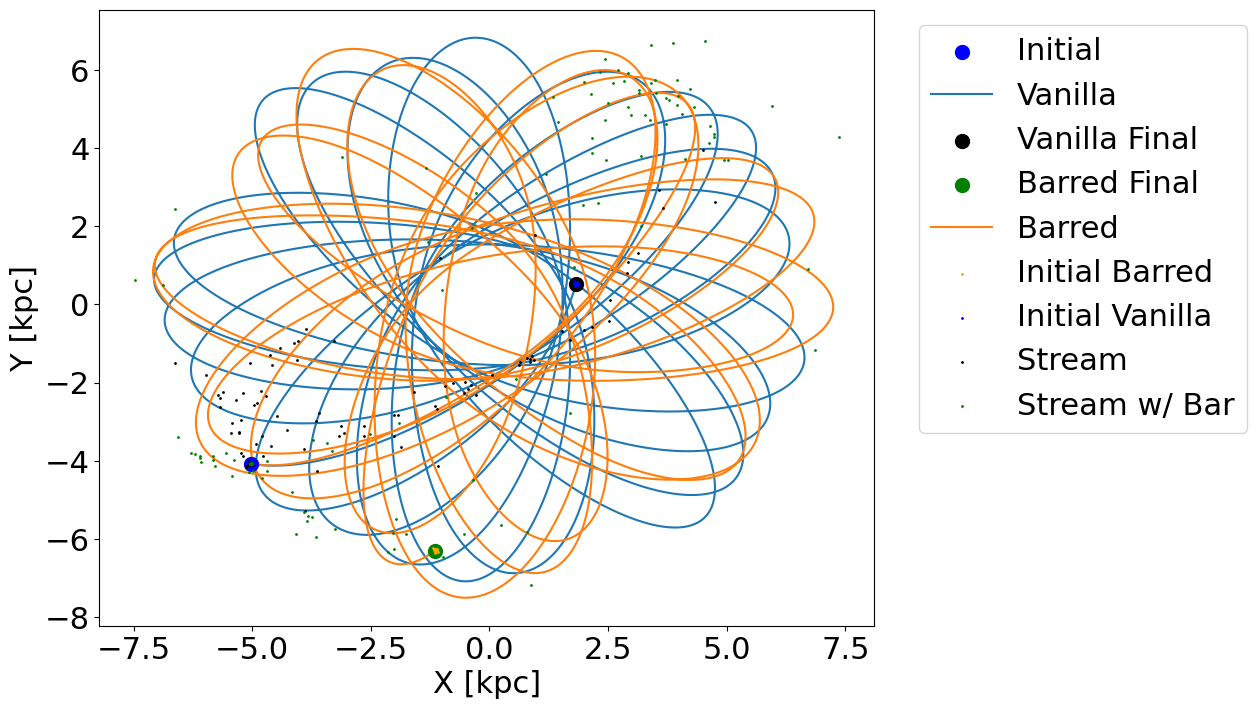

In [21]:
AXIS={"xlabel":"X [kpc]","ylabel":"Y [kpc]"}
fig,axis=plt.subplots(1,1,figsize=(10,8))
axis.scatter(x0,y0,label="Initial ",color="blue",s=100,zorder=10)
axis.plot(xt,yt,label="Vanilla")
axis.scatter(xf,yf,label="Vanilla Final",color="k",s=100,zorder=10)
axis.scatter(xfbar,yfbar,label="Barred Final",color="green",s=100,zorder=10)
axis.plot(xbar,ybar,label="Barred")
axis.scatter(xp0bar,yp0bar,label="Initial Barred",color="orange",s=1,zorder=10)
axis.scatter(xp0,yp0,label="Initial Vanilla",color="blue",s=1,zorder=10)
axis.scatter(xpf,ypf,s=1,color="k",zorder=12,label="Stream")
axis.scatter(xpfbar,ypfbar,s=1,color="g",zorder=12,label="Stream w/ Bar")
axis.set(**AXIS)
axis.legend(loc='upper right', bbox_to_anchor=(1.5, 1),)